SVM 구현완료  
  
이전 처럼 행렬로 만들어서 처리할려다가 계속 오류가 발생해서 반복문으로 제어  
이부분이 속도차이를 만드는 것으로 생각  
  
역시나 sklearn에서 어떤 방법으로 강화하였는지는 미지수  
  
이번 문제에서는 logistic이 더 강력한 것으로 추정

In [1]:
# breast cancer
from sklearn.datasets import load_breast_cancer
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

np.random.seed(13)

d = load_breast_cancer()

data = pd.DataFrame(d.data, columns=d.feature_names)
target = pd.DataFrame(d.target).replace(0, -1)

train_X, test_X, train_y, test_y = train_test_split(data, target, test_size=0.3, random_state=2019, shuffle=True)

In [2]:
from sklearn.svm import SVC

svc = SVC(kernel='linear').fit(data, target.values)
accuracy_score(target, svc.predict(data))

c:\users\young\anaconda3\envs\study\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9666080843585237

In [3]:
def hinge(x, y, w, b):
    if 1 - y * (x@w - b) > 0:
        return 1
    else:
        return 0
    
def custom_svc(x, y, w, b, lr=0.01, lamda=3):
    x = x.values
    y = y.values.flatten()
    loss = 0
    new_w = w.copy()
    for k in range(len(x)):
        loss += max(0, 1-y[k]*(x[k]@w - b))/len(x)
    loss += w.T@w
    for i in range(len(x)):
        for j in range(len(w)):
            oper = hinge(x[i], y[i], w, b)
            w[j] += lr * oper*y[i]*x[i][j]/len(x)
        w[j] *= (1-lr*lamda)

    return w, loss
            

In [4]:
w = np.random.normal(0, 1, len(data.columns))
b = 1
hist = []
for _ in range(100):
    w, loss = custom_svc(data, target, w, b)
    hist.append(loss)
    if loss < 1e-3:
        break

In [5]:
w

array([ 1.05840901e+00,  7.22606415e-02,  8.74826742e-01,  7.56673603e-01,
        1.28489372e+00,  4.65945901e-01, -1.59371043e+00, -1.11601844e+00,
        6.82017078e-01,  2.72398403e-01, -2.33351601e-01,  1.76253990e+00,
       -3.00833201e+00, -4.37576983e-01,  2.15591533e-01,  1.22480103e-02,
       -1.17275721e+00,  4.18985490e-01,  2.19874474e-01,  1.11696432e-01,
       -1.90419220e+00,  1.97756022e+00,  1.08923850e+00, -8.57044229e-01,
       -1.91199196e-01, -9.99121713e-02,  1.20067625e-01,  1.47241388e+00,
        3.99225962e-01, -2.84303937e-06])

In [6]:
res = data.values @ w - b
print(res)

[-7.50988277e+02 -4.04073990e+02 -3.00946099e+02 -2.03847271e+00
 -1.29213213e+02 -7.55418299e+01 -3.18549125e+02 -1.25050140e+02
 -1.81842962e+01 -1.76186086e+01 -1.31876714e+02 -2.83312734e+02
 -4.82105363e+01  7.12680263e+01  7.76482860e+01 -5.42658295e+01
 -2.26296197e+02 -2.72209946e+02 -8.18793123e+02  1.30186202e+01
  5.06983131e+01  7.19768531e+01 -9.03728947e+01 -8.67934472e+02
 -9.54114051e+02 -3.44462794e+02 -2.74270490e+01 -1.36512505e+02
 -2.57642234e+02 -1.01254428e+02 -3.40373638e+02 -2.19749066e+02
 -2.21142561e+02 -3.89596931e+02 -2.19315005e+02 -1.42918018e+02
  3.07839902e+01  1.21332843e+02  8.86475916e+01  8.18298092e+00
 -2.98028453e+01  4.57333453e+01 -3.02797719e+02 -1.47775922e+02
 -9.12870685e+00 -2.80642845e+02  8.31895215e+01 -3.37016072e+01
  2.16888659e+01  4.71462475e+01  5.80152897e+01  7.45709741e+01
  5.60979110e+01 -1.25027482e+02 -1.02872067e+02  4.66467811e+01
 -7.02087205e+02 -1.18530954e+02  4.58778358e+01  6.29679819e+01
  5.48467309e+01  8.17784

In [7]:
accuracy_score(target, list(map(lambda x: 1 if x > 0 else -1, res)))

0.9103690685413005

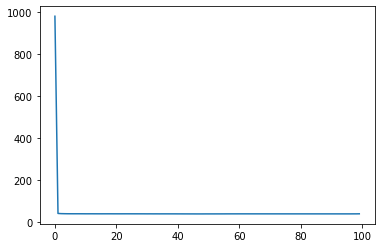

In [8]:
sns.lineplot(data=np.array(hist))

In [9]:
import keras 
from keras import layers, models
from keras.regularizers import L1L2

m1 = models.Sequential()
m1.add(layers.Dense(1, activation='linear', kernel_regularizer=L1L2(l1=0, l2=3)))

m1.compile(optimizer = 'adam',
          loss = 'hinge')

Using TensorFlow backend.


In [10]:
m1.fit(data.values, target.values,
      epochs=200)

Epoch 1/200
569/569 [==============================] - 0s 608us/step - loss: 286.1277
Epoch 2/200
569/569 [==============================] - 0s 60us/step - loss: 267.7240
Epoch 3/200
569/569 [==============================] - 0s 61us/step - loss: 248.3442
Epoch 4/200
569/569 [==============================] - 0s 61us/step - loss: 230.0903
Epoch 5/200
569/569 [==============================] - 0s 63us/step - loss: 211.1819
Epoch 6/200
569/569 [==============================] - 0s 60us/step - loss: 193.1781
Epoch 7/200
569/569 [==============================] - 0s 65us/step - loss: 174.7506
Epoch 8/200
569/569 [==============================] - 0s 64us/step - loss: 156.5799
Epoch 9/200
569/569 [==============================] - 0s 60us/step - loss: 138.2144
Epoch 10/200
569/569 [==============================] - 0s 61us/step - loss: 120.7223
Epoch 11/200
569/569 [==============================] - 0s 61us/step - loss: 102.0396
Epoch 12/200
569/569 [==============================] - 0s 63u

569/569 [==============================] - 0s 63us/step - loss: 0.8404
Epoch 99/200
569/569 [==============================] - 0s 67us/step - loss: 0.8134
Epoch 100/200
569/569 [==============================] - 0s 65us/step - loss: 0.7909
Epoch 101/200
569/569 [==============================] - 0s 70us/step - loss: 0.7768
Epoch 102/200
569/569 [==============================] - 0s 65us/step - loss: 0.7592
Epoch 103/200
569/569 [==============================] - 0s 61us/step - loss: 0.7325
Epoch 104/200
569/569 [==============================] - 0s 67us/step - loss: 0.7176
Epoch 105/200
569/569 [==============================] - 0s 63us/step - loss: 0.6979
Epoch 106/200
569/569 [==============================] - 0s 61us/step - loss: 0.6849
Epoch 107/200
569/569 [==============================] - 0s 63us/step - loss: 0.6603
Epoch 108/200
569/569 [==============================] - 0s 63us/step - loss: 0.6410
Epoch 109/200
569/569 [==============================] - 0s 69us/step - loss: 0.

569/569 [==============================] - 0s 67us/step - loss: 0.2105
Epoch 195/200
569/569 [==============================] - 0s 61us/step - loss: 0.2552
Epoch 196/200
569/569 [==============================] - 0s 67us/step - loss: 0.2333
Epoch 197/200
569/569 [==============================] - 0s 68us/step - loss: 0.2059
Epoch 198/200
569/569 [==============================] - 0s 68us/step - loss: 0.2032
Epoch 199/200
569/569 [==============================] - 0s 65us/step - loss: 0.2105
Epoch 200/200
569/569 [==============================] - 0s 63us/step - loss: 0.2067


In [11]:
accuracy_score(target.replace(-1, 0), m1.predict_classes(data))

0.9209138840070299